
# Project: NO Show appointment dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
>A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.

>‘Neighborhood’ indicates the location of the hospital.

>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

> In this dataset we have 14 columns and 110527 samples
### Question(s) for Analysis
> Does the age of patients affect on attendence?

> Is the gender of patients affect on the attendence to the appointment?

> Does the age and chronic disease affect on attendence to the appointment ?

> Does receiving SMS affect the patient's attendance to the appointment?

> Does the neighbourhood affect the patient's attendance to the appointment?

In [1]:
# importing library 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties

In [3]:

# load and read data noshowappointment_2016.csv
df= pd.read_csv('noshowappointments_2016.csv')
# display first five raws
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# show the number of raws and columns
df.shape

(110527, 14)

The dataset has 14 columns and 110527 of raws 

In [6]:
# show the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing value in data set 
We have a patientId but must be integer (but we are do not need in this data analysis so we can drop it later)

In [9]:
# show if we have any dublicated raw
sum(df.duplicated())

0

NO dublicated raws

In [11]:
# summary statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the average age of patients is 37 years old and the maximum age is 115 years old 

the minimum age is (-1) and that is not make sense (so we can treat with it later )

the averge of scholarship is 9% 

The average of hypertension is 19.7%

The average of Diapetes is 7%

In [12]:
#identefying the rows which contain the value of age =-1
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
> I will remove not necessary columns 

> Removing the raw contain the age =-1

>renaming the hipertention and no-show columns
 

In [13]:
# Removing the row which contains age =-1
df.drop(index=99832,inplace=True)

In [14]:
#summary statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# Drobing the columns not necessary in this data analysis
df.drop(['PatientId','AppointmentID','AppointmentDay','ScheduledDay'],axis=1 ,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
# renaming two columns to be easy for me 
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
#display the five raws from data 
df.head(10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Take a general look on data


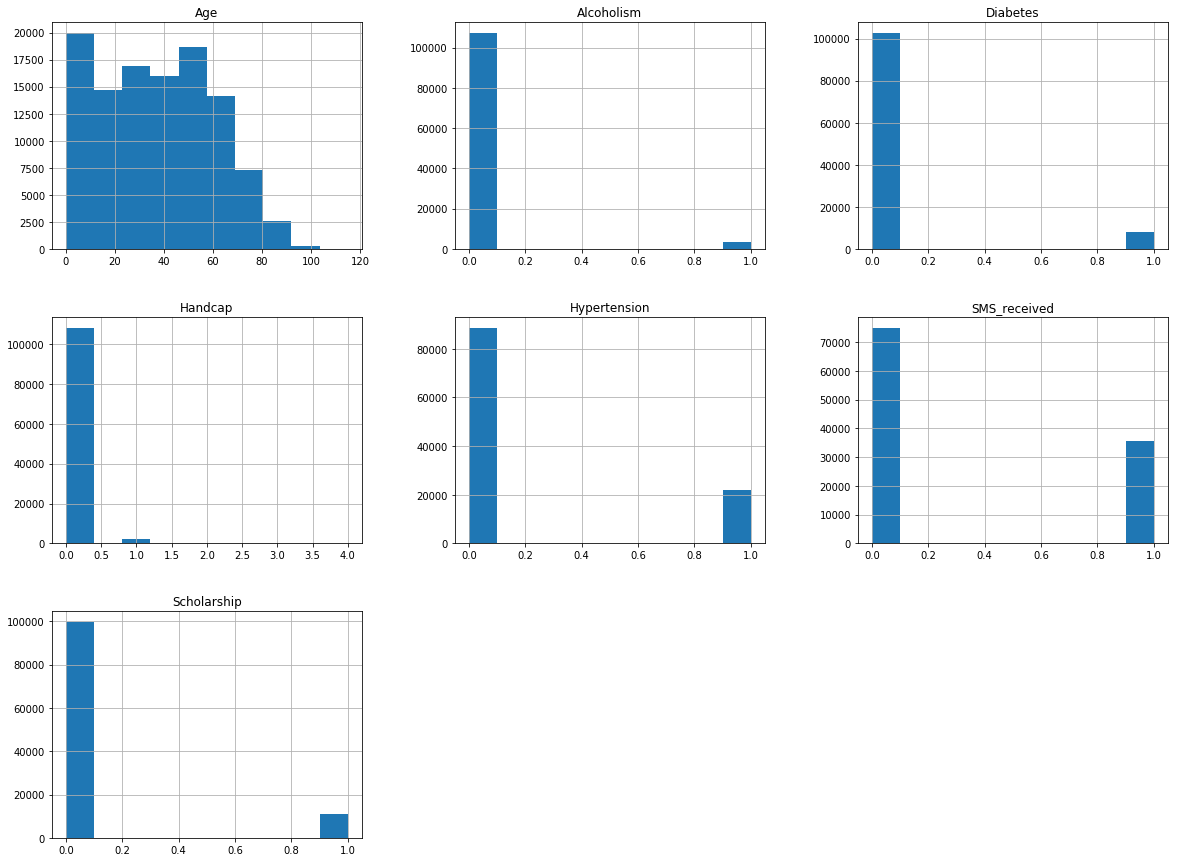

In [24]:
# what is the dataset look like (Histogram of whole graph)
df.hist(figsize=(20,15)); 

In [34]:
# devide the patient to two groups show and noshow (for comparison) 
show = df.No_show =='No'
noshow = df.No_show =='Yes'
df[show].count() , df[noshow].count()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hypertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handcap          88207
 SMS_received     88207
 No_show          88207
 dtype: int64, Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handcap          22319
 SMS_received     22319
 No_show          22319
 dtype: int64)

In this dataset the number of patients attend to the appointment are 88207 and the patients not attend to the appointment are 22319

### Question 1: Does the age of patients affect on attendence?



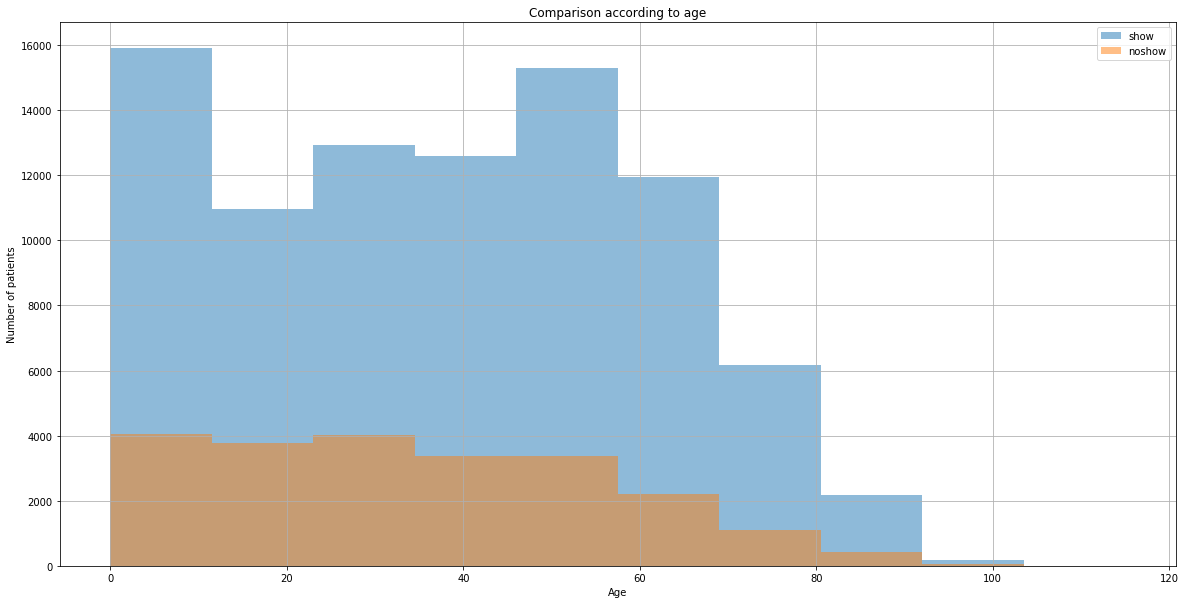

In [38]:
# Make histogram to show the comparison of attendence and absent patient according age
plt.figure(figsize=[20,10])
df.Age[show].hist(alpha=0.5,label='show')
df.Age[noshow].hist(alpha=0.5,label='noshow')
plt.legend();
plt.title('Comparison according to age')
plt.xlabel('Age')
plt.ylabel('Number of patients');

No corelation between the age of patients and their attendence 


### Question 2 :Is the gender of patients affect on the attendence to the appointment?



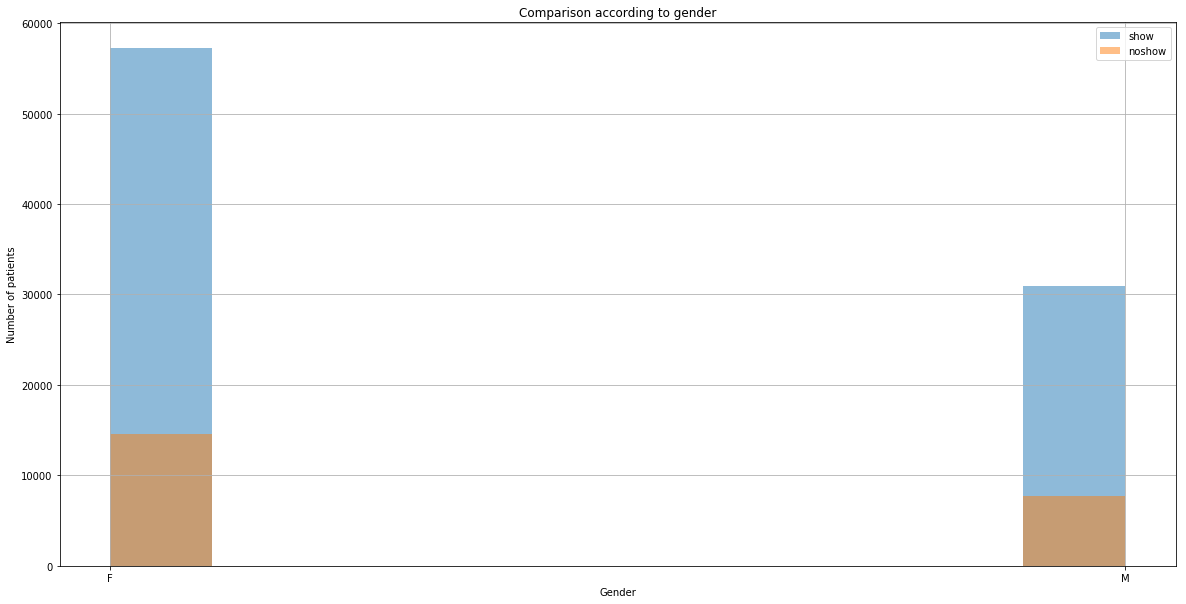

In [40]:
# Make histogram to show the comparison of attendence and absent patient according to gender
plt.figure(figsize=[20,10])
df.Gender[show].hist(alpha=0.5,label='show')
df.Gender[noshow].hist(alpha=0.5,label='noshow')
plt.legend();
plt.title('Comparison according to gender')
plt.xlabel('Gender')
plt.ylabel('Number of patients');


No corelation between gender and attendence to the appointment 

### Question 3: Does the age and chronic disease affect on attendence to the appointment ?

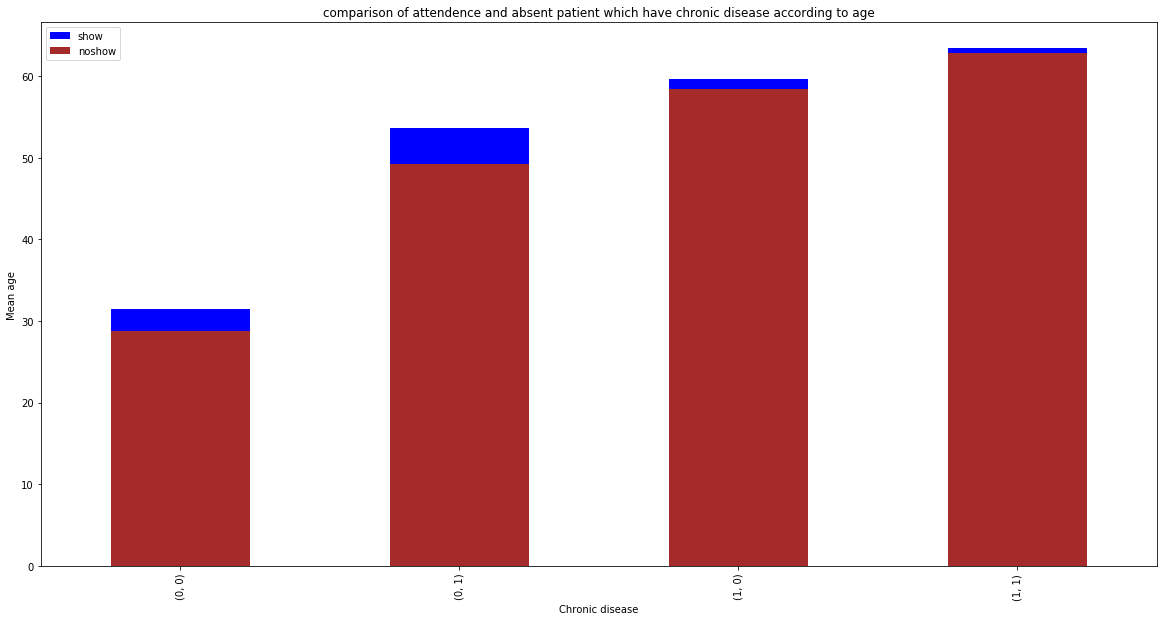

In [49]:
# Make bar chart to show the comparison of attendence and absent patient which have chronic disease according to age
plt.figure(figsize=[20,10])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar' , color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='brown',label='noshow')
plt.legend();
plt.title('comparison of attendence and absent patient which have chronic disease according to age')
plt.xlabel('Chronic disease')
plt.ylabel('Mean age');

In [50]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age']
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

Hypertension  Diabetes
0             0           28.834155
              1           49.183391
1             0           58.377043
              1           62.820333
Name: Age, dtype: float64

There are direct corelation between mean ages and chronic disease

No correlation between chronic diseace and attendence

### Question 4 :Does receiving SMS affect the patient's attendance to the appointment?

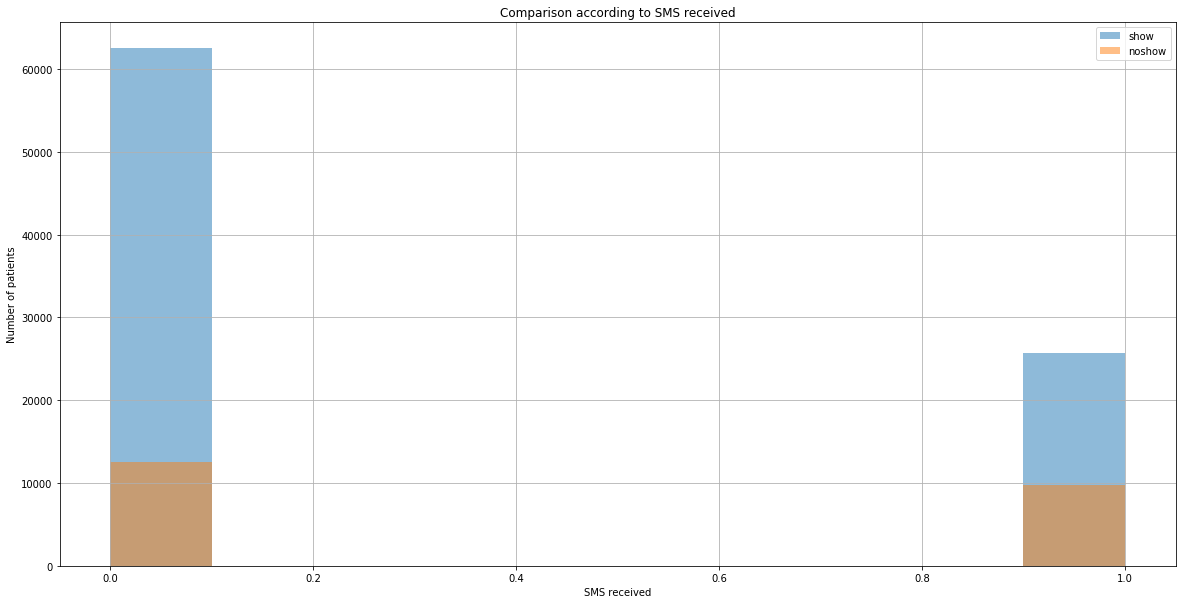

In [41]:
# Make histogram to show the comparison of attendence and absent patient according to SMS received
plt.figure(figsize=[20,10])
df.SMS_received [show].hist(alpha=0.5,label='show')
df.SMS_received [noshow].hist(alpha=0.5,label='noshow')
plt.legend();
plt.title('Comparison according to SMS received')
plt.xlabel('SMS received')
plt.ylabel('Number of patients');

The patients who received SMS half of them do not attend the appointment where the patients do not received SMS quarter of them do not attend the appointment 

### Question 5: Does the neighbourhood affect the patient's attendance to the appointment?

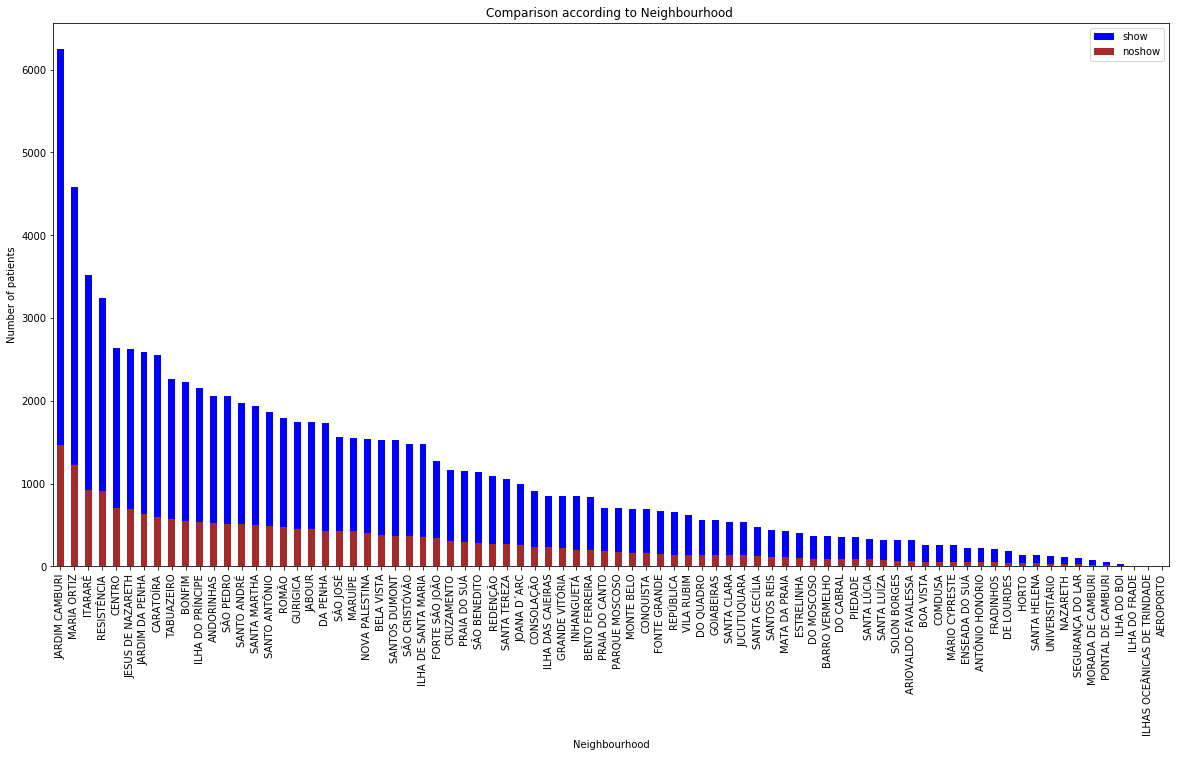

In [48]:
# Make a bar chart to show the comparison of attendence and absent patient according to neighbourhood
plt.figure(figsize=[20,10])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='brown',label='noshow')
plt.legend();
plt.title('Comparison according to Neighbourhood ')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients');

The neighborhood has effect on attendence 

<a id='conclusions'></a>
## Conclusions

>There are direct corelation between mean ages and chronic disease

>The patients who received SMS half of them do not attend the appointment where the patients do not received SMS quarter of them do not attend the appointment 

>The neighborhood has effect on attendence

### Limitations
>No corelation between the age of patients and their attendence 

>No correlation between chronic diseace and attendence

>No corelation between the gender of patients and their attendence


In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0